In [1]:
import sys, os
sys.path.append(os.path.realpath(".."))

import util_funcs
from importlib import reload
reload(util_funcs)
from copy import deepcopy as cp

import data_reader as read
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import pywt
import tsfresh.feature_extraction.feature_calculators as feats
import constants
import clinical_text_analysis as cta
reload(cta)
import tsfresh
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from os import path

reload(read)
import wf_analysis.datasets as wfdata
import wf_analysis.filters as filt
reload(filt)
import time

In [2]:
testDataGenders = pkl.load(open("../combined_simple_ensemble_test_data.pkl", 'rb'))

In [3]:
data = testDataGenders[0:100]

In [4]:
reload(read)
ss = read.EdfStandardScaler(data, dataset_includes_label=True)

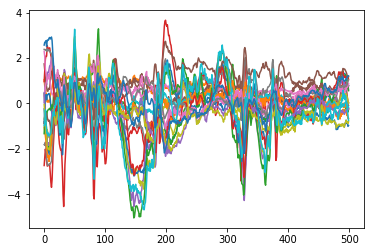

In [5]:
plt.plot(ss[0][0])

In [16]:
testGenders = [datum[1] for datum in testDataGenders]

In [18]:
testData = np.stack([datum[0] for datum in testDataGenders])


In [19]:
testData.shape

(27259, 500, 21)

In [22]:
testData.reshape(testData.shape[0], -1).std(axis=0).argmax()

4727

(array([ 410., 3823., 3108.,  736., 1414.,   95.,  433.,    6.,    0.,
         475.]),
 array([113.181854, 160.4754  , 207.76895 , 255.06248 , 302.35605 ,
        349.6496  , 396.9431  , 444.23666 , 491.5302  , 538.8238  ,
        586.1173  ], dtype=float32),
 <a list of 10 Patch objects>)

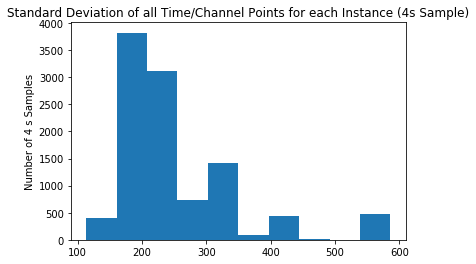

In [26]:
plt.title("Standard Deviation of all Time/Channel Points for each Instance (4s Sample)")
plt.ylabel("Number of 4 s Samples")
plt.hist(testData.reshape(testData.shape[0], -1).std(axis=0))

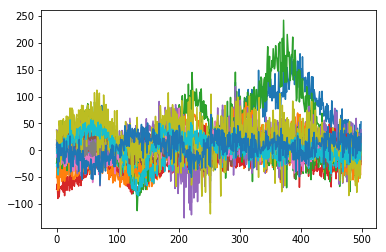

In [23]:
datum = testData[4727]
for i in range(21):
    plt.plot(datum[:, i])

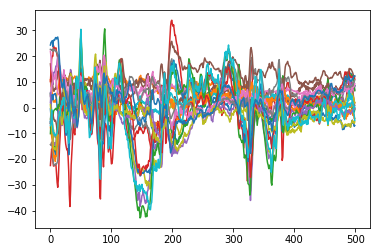

In [24]:
datum = testData[0]
for i in range(21):
    plt.plot(datum[:, i])